In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from scipy import stats

from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload 2

In [2]:
asso2 = pd.read_pickle('/data/ana_asso_2Hz_reci')
asso50 = pd.read_pickle('/data/ana_asso_50Hz_reci')

In [3]:
asso2

,Before,After,File name,elimi
139,"{'trace_y2': [[1.68670002344e-12, 1.4439300699...","{'trace_y2': [[3.47532909885e-13, 2.8264210881...",2017111401,50
140,"{'trace_y2': [[6.80390164064e-13, 7.2233738233...","{'trace_y2': [[9.49637861834e-13, 1.1239784385...",2017111402,35
141,"{'trace_y2': [[5.18260617945e-12, 4.7383874481...","{'trace_y2': [[7.65277047211e-13, 9.4883946811...",2017111501,16
142,"{'trace_y2': [[1.52993523093e-12, 1.4215881105...","{'trace_y2': [[2.66297943615e-13, 1.4080252437...",2017111601,50
143,"{'trace_y2': [[4.00231097777e-13, 2.8161799232...","{'trace_y2': [[2.72971578677e-13, 1.7815610376...",2017111601,30
144,"{'trace_y2': [[9.24901902369e-13, 7.5806105567...","{'trace_y2': [[4.31793219465e-13, 5.8302678073...",2017111602,17
145,"{'trace_y2': [[4.3592699296e-12, 4.54226001102...","{'trace_y2': [[1.44624554524e-12, 1.5545314081...",2017111001,25
146,"{'trace_y2': [[1.02784371677e-12, 9.7243244224...","{'trace_y2': [[5.49207783265e-13, 6.9908841200...",2017111002,25


In [4]:
asso50

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
53,"{'trace_y2': [[1.86484020168e-12, 1.8622755864...","{'trace_y2': [[4.62974614713e-14, 6.9924848082...",2016120503,50,[],"[74, 97, 110]"
56,"{'trace_y2': [[2.88928124002e-14, 1.1336283930...","{'trace_y2': [[3.00748262352e-13, 1.5162310568...",2016092901,40,[],[86]
58,"{'trace_y2': [[1.09862465999e-13, 3.7831439335...","{'trace_y2': [[5.26834199945e-14, 2.9417308734...",2016120202,50,"[3, 30]",[]
60,"{'trace_y2': [[5.01251132971e-13, 3.9419787782...","{'trace_y2': [[1.68256095854e-12, 1.6511943825...",2016120504,17,[6],[34]
62,"{'trace_y2': [[4.96023555157e-12, 6.0260723584...","{'trace_y2': [[6.1668670432e-12, 8.03399988043...",2017051001,50,[],[120]
63,"{'trace_y2': [[4.18157526971e-12, 3.8490218486...","{'trace_y2': [[3.06768408494e-12, 2.2854296154...",2017051002,50,"[27, 41]","[74, 97, 110]"


/src/Patch_ana/Patch_ana/patch_pip.py:500: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

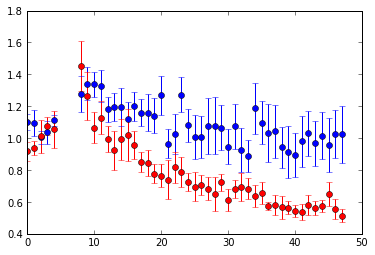

In [5]:
ave_ptl_resp = np.ones((len(asso2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(asso2, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(asso50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(asso50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')


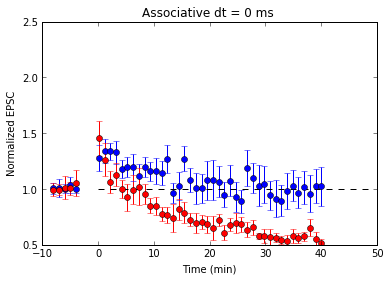

In [6]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(asso2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(asso50)))


plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.title('Associative dt = 0 ms ')

plt.ylim([0.5, 2.5])

with PdfPages('/data/Figure4_1.pdf') as pdf:
    pdf.savefig()
    

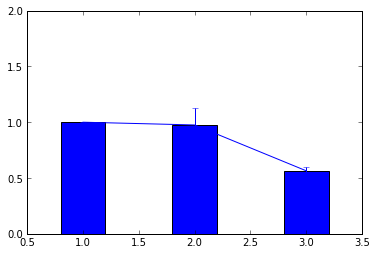

In [7]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,2])

with PdfPages('/data/Figure4_4.pdf') as pdf:
    pdf.savefig()

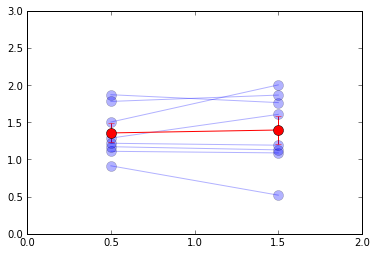

In [8]:
# Compare PPR
mean_PPR_bef = [np.nanmean(asso2['Before'].loc[i]['PPR']) for i in asso2['Before'].index]
mean_PPR_aft = [np.nanmean(asso2['After'].loc[i]['PPR'][-10:]) for i in asso2['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp4_1.pdf') as pdf:
    pdf.savefig()

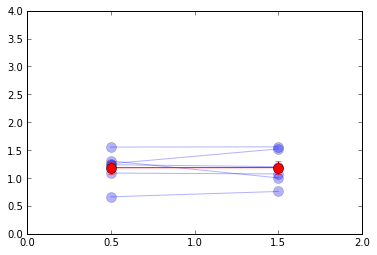

In [9]:
# Compare PPR
mean_PPR_bef = [np.nanmean(asso50['Before'].loc[i]['PPR']) for i in asso50['Before'].index]
mean_PPR_aft = [np.nanmean(asso50['After'].loc[i]['PPR'][-10:]) for i in asso50['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,4])
with PdfPages('/data/Supp4_2.pdf') as pdf:
    pdf.savefig()

In [10]:
stats.ttest_rel(mean_PPR_bef, mean_PPR_aft)

Ttest_relResult(statistic=-0.022561503529023429, pvalue=0.98287274824803172)

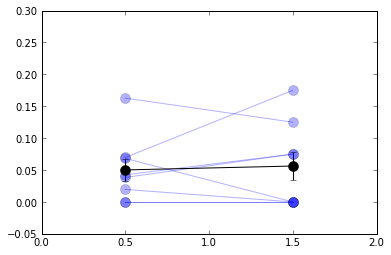

In [11]:
# Compare failure rate
mean_fail_bef = [np.sum(asso2['Before'].loc[i]['failure'])/len(asso2['Before'].loc[i]['failure']) for i in asso2['Before'].index]
mean_fail_aft = [np.sum(asso2['After'].loc[i]['failure'][-40:])/40 for i in asso2['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(len(mean_fail_bef))
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(len(mean_fail_aft))

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.3])

with PdfPages('/data/Figure4_5.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-1.9678449675213927, pvalue=0.10621641296108746)


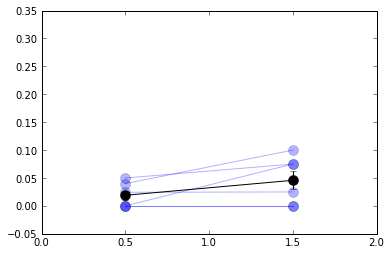

In [12]:
# Compare failure rate
mean_fail_bef = [np.sum(asso50['Before'].loc[i]['failure'])/len(asso50['Before'].loc[i]['failure']) for i in asso50['Before'].index]
mean_fail_aft = [np.sum(asso50['After'].loc[i]['failure'][-40:])/40 for i in asso50['After'].index]
print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(len(mean_fail_bef))
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(len(mean_fail_aft))

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.35])

with PdfPages('/data/Figure4_6.pdf') as pdf:
    pdf.savefig()

/src/Patch_ana/Patch_ana/patch_pip.py:500: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


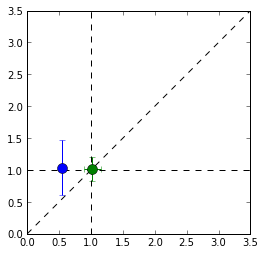

In [13]:
# CV analysis
r_50, pi_50 = patch_pip.cv_analysis(asso50, bef_len=10, aft_len=100)
r_50.pop(0)
pi_50.pop(0)

plt.errorbar(np.mean(pi_50), np.mean(r_50), np.std(r_50)/np.sqrt(len(r_50)), np.std(pi_50)/np.sqrt(len(pi_50)),  'o', markersize=10)

# CV analysis
r_2, pi_2 = patch_pip.cv_analysis(asso2, bef_len=20, aft_len=100)
plt.errorbar(np.mean(pi_2), np.mean(r_2), np.std(r_2)/np.sqrt(len(r_2)), np.std(pi_2)/np.sqrt(len(pi_2)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
# plt.xlim([0, 1.5])
# plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure4_7.pdf') as pdf:
    pdf.savefig()